In [1]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit
import random as rd
import time

In [2]:
file_url="supermarket_data.csv"

#Load data from CSV
supermarket_file=pd.read_csv(file_url)

In [3]:
#Show sample of information
supermarket_file.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65


In [4]:
#We count which hour do basket were bought most

hourCount={}

for index,row in supermarket_file.iterrows():
    SHOP_DATE=(row['SHOP_DATE'])
    SHOP_HOUR=(row['SHOP_HOUR'])
    
    BASKET_ID=(row['BASKET_ID'])
    
    if not SHOP_HOUR in hourCount:
        hourCount[SHOP_HOUR]={}

    #We list all baskets in each hour
    hourCount[SHOP_HOUR][BASKET_ID]=1
 


for hour,baskets in hourCount.items():
    #We find total baskets in each hour
    hourCount[hour]=len(baskets)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, '# of baskets by hour')

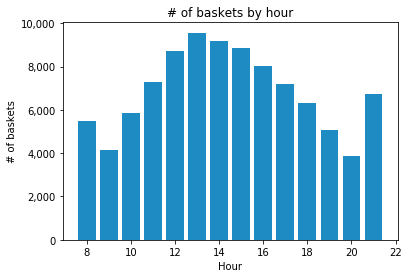

In [5]:
#We plot the cycle of basket bought by hour

plt.bar(hourCount.keys(),hourCount.values(),color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Hour')
ax.set_ylabel('# of baskets')
plt.title('# of baskets by hour')

In [6]:
#We count which month do basket were bought most

dateCount={}

for index,row in supermarket_file.iterrows():
    SHOP_DATE=str(row['SHOP_DATE'])

    BASKET_ID=(row['BASKET_ID'])

    yyyymm=SHOP_DATE[0:6]
    
    if not yyyymm in dateCount:
        dateCount[yyyymm]={}

    #We list all baskets in each mont
    dateCount[yyyymm][BASKET_ID]=1
 
for date,baskets in dateCount.items():
    #We find total baskets in each month
    dateCount[date]=len(baskets)

In [7]:
#We set the x-axis for the monthly plot

date_pivot=[]

for year in range(2007,2009):
    for month in range(1,13):
        if year==2008 and month>7:
            break
        date_pivot.append(str(year)+str(month).zfill(2))
        
date_pivot

['200701',
 '200702',
 '200703',
 '200704',
 '200705',
 '200706',
 '200707',
 '200708',
 '200709',
 '200710',
 '200711',
 '200712',
 '200801',
 '200802',
 '200803',
 '200804',
 '200805',
 '200806',
 '200807']

Text(0.5, 1.0, '# of baskets by date')

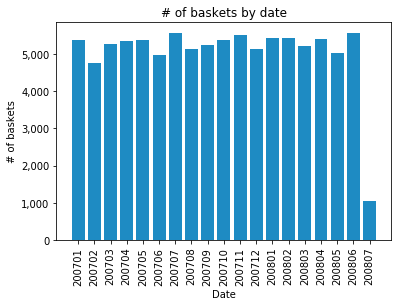

In [8]:
#We plot the pattern of basket bought by month

plt.bar(dateCount.keys(),dateCount.values(),color='#1E8BC3')
ax = plt.subplot()
ax.set_xticklabels(date_pivot)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Date')
ax.set_ylabel('# of baskets')
plt.title('# of baskets by date')

In [9]:
#We find how much do each customers spend for their life time

purchasePower={}

for index,row in supermarket_file.iterrows():
    SPEND=(row['SPEND'])

    CUST_CODE=(row['CUST_CODE'])

    if not CUST_CODE in purchasePower:
        purchasePower[CUST_CODE]=0

    purchasePower[CUST_CODE]+=SPEND

len(purchasePower)

4891

Text(0.5, 1.0, '# of Total purchase power')

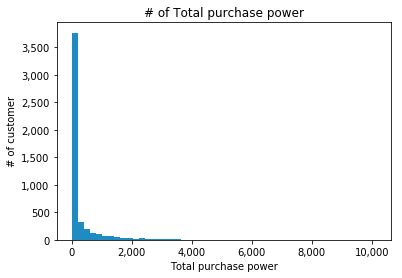

In [14]:
#We plot the frequency of total purchase power. It indicates that most people tend to spend less than $200 for their life time

plt.hist(purchasePower.values(), 50, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Total purchase power')
ax.set_ylabel('# of customer')
plt.title('# of Total purchase power')

In [11]:
#We find how many time do each customers buy in the supermarket for their life time

purchaseTime={}

for index,row in supermarket_file.iterrows():
    BASKET_ID=(row['BASKET_ID'])
    SPEND=(row['SPEND'])
    CUST_CODE=(row['CUST_CODE'])

    if not CUST_CODE in purchaseTime:
        purchaseTime[CUST_CODE]={}

    if not BASKET_ID in purchaseTime[CUST_CODE]:
        purchaseTime[CUST_CODE][BASKET_ID]=0
        
    purchaseTime[CUST_CODE][BASKET_ID]+=SPEND

for customer_id,baskets in purchaseTime.items():
    purchaseTime[customer_id]=len(baskets)

Text(0.5, 1.0, '# of time of purchasing')

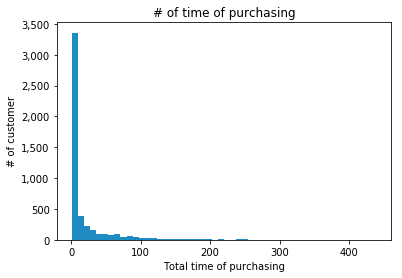

In [15]:
#We plot the frequency of time of purchasing. It indicates that most people tend to spend less than 10 time for their life time

plt.hist(purchaseTime.values(), 50, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Total time of purchasing')
ax.set_ylabel('# of customer')
plt.title('# of time of purchasing')

In [13]:
#We find average spend per purchase in each customers for their life time

averagePurchase={}

for customer_id,spend in purchasePower.items():
    averagePurchase[customer_id]=purchasePower[customer_id]/purchaseTime[customer_id]

Text(0.5, 1.0, 'Average spending by customer')

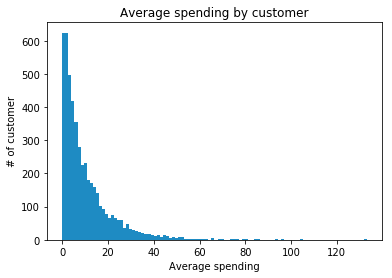

In [16]:
#We plot the average spending per customer. It shows the distribution of the average spending as shown below

plt.hist(averagePurchase.values(), 100, facecolor='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Average spending')
ax.set_ylabel('# of customer')
plt.title('Average spending by customer')

In [18]:
#We want to plot scatter between total spending and time of purchasing for each customers to search for insights

x_purchaseTime=[]
y_spending=[]

for customer_id,spend in purchasePower.items():
    x_purchaseTime.append(purchaseTime[customer_id])
    y_spending.append(purchasePower[customer_id])

In [19]:
# Compute linear regression for the relationship between total spending and time of purchasing

b, m = polyfit(x_purchaseTime, y_spending, 1)
b,m

(13.612106398658359, 12.235655399611323)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


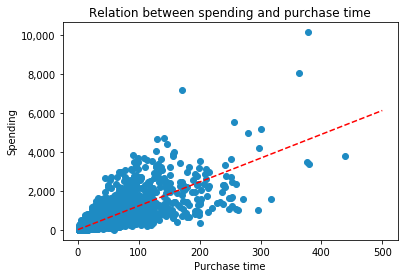

In [20]:
# We plot the scatter as shown below. And we can detect which customers purchase often with low spending so they would be our target for 
#boosting their revenue. 

plt.scatter(x_purchaseTime,y_spending,color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Purchase time')
ax.set_ylabel('Spending')
plt.title('Relation between spending and purchase time')

x = np.linspace(0, 500, 50)
plt.plot(x,  m*x+b, linestyle='dashed',color="red")

In [4]:
#Next, we will show how to implement user-based collaborative filtering recommender system

# We want to know how many do each products bought for their life time
productBoughtCount={}

for index,row in supermarket_file.iterrows():
    PROD_CODE=(row['PROD_CODE'])
    QUANTITY=int(row['QUANTITY'])
    
    if not PROD_CODE in productBoughtCount:
        productBoughtCount[PROD_CODE]=[0]

    productBoughtCount[PROD_CODE][0]+=QUANTITY

In [5]:
# We show the amount of buying for each products

product_dataframe=pd.DataFrame.from_dict(productBoughtCount, orient='index',columns=['amount of buying'])
product_dataframe.head()

,amount of buying
PRD0901391,242
PRD0901915,1422
PRD0903379,41
PRD0903305,15
PRD0903387,51


In [6]:
# We want to know how many products in the supermarket (In this case: 4,978 products)

product_dataframe.count()

amount of buying    4978
dtype: int64

In [7]:
# We want to list the products (for recommender system) which have significant amount of buying by picking one which have more than average of buying
# because we want to focus on the important products and we want to reduce complexity of the model.

significant_product_dataframe=product_dataframe[product_dataframe['amount of buying']>=int(product_dataframe.mean())]
significant_product_dataframe.head()

,amount of buying
PRD0901391,242
PRD0901915,1422
PRD0903764,1618
PRD0903130,5667
PRD0900183,688


In [8]:
# We want to know how many products, with the significant amount of buying, in the supermarket (In this case: 1,092 products)

significant_product_dataframe.count()

amount of buying    1092
dtype: int64

In [42]:
# We create variable assigning amount of buying to each product

significantProductBoughtCount={}

for product_id,freq in productBoughtCount.items():

    if (freq[0]>int(product_dataframe.mean())):
        significantProductBoughtCount[product_id]=[freq]

In [43]:
# We create variable mapping the productid to index and mapping index to productid

productid_to_index={product_id:index for index,product_id in enumerate(significantProductBoughtCount)}
index_to_productid={index:product_id for index,product_id in enumerate(significantProductBoughtCount)}

In [64]:
# We create the basket vector showing what do each customer buy in their basket.

basket_vectors={}

for index,row in supermarket_file.iterrows():

    BASKET_ID=str(row['BASKET_ID'])
    PROD_CODE=row['PROD_CODE']
    
    QUANTITY=row['QUANTITY']
    
    #We focus only on significant products
    if PROD_CODE in productid_to_index:
        if not BASKET_ID in basket_vectors:
            basket_vectors[BASKET_ID]={}
            
        product_index=productid_to_index[PROD_CODE]
            
        # We reduct the bias of large number by using logarithm transformation
        basket_vectors[BASKET_ID][product_index]=math.log(QUANTITY+1)
        
# each vector indicates each basket

In [65]:
# We compute the length of each basket vector

basket_vector_size={}

for basket_id,vector in basket_vectors.items():
    vector_size=0
    for product_id,weight in vector.items():
        vector_size+=weight**2
    basket_vector_size[basket_id]=math.sqrt(vector_size)

In [66]:
# We split the training set and the testing set with the ratio 90:10

basket_keys =  list(basket_vectors.keys()) 
rd.shuffle(basket_keys)

basket_vectors_train={}
basket_vectors_test={}

train_test_split_ratio=0.1

for index in range(len(basket_keys)):
    basket_id=basket_keys[index]
    if index<train_test_split_ratio*len(basket_keys):
        basket_vectors_test[basket_id]=basket_vectors[basket_id]
    else:
        basket_vectors_train[basket_id]=basket_vectors[basket_id]

In [67]:
def cosineSimilarity(my_vector,my_vector_size):
    # We compute all the cosine similarity between our basket vector and other basket vectors
    
    # cos = (A*B)/(|A||B|)
    vector_score={}
    
    for basket_id,vector in basket_vectors_train.items():
        vector_score[basket_id]=0
        
        # We want to compute the dot product in the intersect weight because the dot product will be nonzero
        intersect_weight=list(set(vector)&set(my_vector))
        
        for weight in intersect_weight:
            vector_score[basket_id]+=(my_vector[weight]*vector[weight])
             
        vector_score[basket_id]/=(my_vector_size*basket_vector_size[basket_id])
        
    return vector_score

In [68]:
def jaccardSimilarity(my_vector):
    # We compute all the jaccard similarity between our basket vector and other basket vectors
    
    # distance = |A^B| / |AUB|
    vector_score={}
    
    for basket_id,vector in basket_vectors_train.items():
        
        intersect_size=len(list(set(vector)&set(my_vector)))
        union_size=len(list(set(vector)|set(my_vector)))

        vector_score[basket_id]=(intersect_size)/(union_size)
        
    return vector_score

In [69]:
# We implement recommender system algorithm

def recommendProduct(product_list):
    
    my_vector={}
    my_vector_size=0
    
    for product,quantity in product_list.items():
        if product in productid_to_index:
            product_index=productid_to_index[product]
            
            my_vector[product_index]=math.log(quantity+1)
            
            my_vector_size+=my_vector[product_index]**2
            
    my_vector_size=math.sqrt(my_vector_size)
            
    #vector_score=cosineSimilarity(my_vector,my_vector_size)
    vector_score=jaccardSimilarity(my_vector)

    # We sort the similarility score for each basket vectors from highest to lowest
    sorted_vector_score=sorted(vector_score.items(), key=lambda item: item[1],reverse=True)

    try_count=0
    
    recommend_product_list=[]
    
    # We want to recommend anything so that we try to find the product to suggest in the first 50 basket vectors
    while (not recommend_product_list and try_count<50):
        # We pick one with the highest cosine similarity and skip to the next highest one if there are nothing to recommend
        recommend_vector_id=sorted_vector_score[try_count][0]

        recommend_vector=basket_vectors_train[recommend_vector_id]

        # We list all the relevant products less products they already own
        recommend_product_id_list=set(basket_vectors_train[recommend_vector_id].keys())-set(my_vector)
        recommend_product_list=[]

        for product_id in recommend_product_id_list:
            recommend_product_list.append(index_to_productid[product_id])
            
        try_count+=1
                   
    #print(try_count,product_list,recommend_product_list)
    return recommend_product_list

In [55]:
# Example of how algorithm works

our_basket={
    'PRD0902613': 1,
    'PRD0902375': 1}

recommendProduct(our_basket)

['PRD0903678']

In [56]:
# We may convert basket vector to the format that can be the input of recommender system

def convertVectorToBasket(vector):
    new_vector={}
    for product_index,log_freq in vector.items():
        product_id=index_to_productid[product_index]
        freq=math.exp(log_freq)-1
        new_vector[product_id]=freq
    return new_vector

In [ ]:
# Compute the accuracy of the testing set

acc_list=[]

count=0

start_time = time.time()
print("Start evaluating")

for basket_id,vector in basket_vectors_test.items():
    
    # We randomly drop one product from the basket and we want to know if recommender system suggest our dropped product
    basket_keys =  list(vector.keys()) 
    rd.shuffle(basket_keys)
    
    pop_index=basket_keys[0]
    product_pop=index_to_productid[pop_index]
    
    preprocess_vector={}
    
    for index in range(1,len(basket_keys)):
        preprocess_vector[basket_keys[index]]=vector[basket_keys[index]]
    
    if (len(preprocess_vector)>0):
        recommend_product_list=recommendProduct(convertVectorToBasket(preprocess_vector))

        # Check if recommend_product_list have our dropped product
        if product_pop in recommend_product_list:
            acc_list.append(1)
        else:
            acc_list.append(0)
            
    count+=1
    
elapsed_time = time.time() - start_time

print("Time usage : "+str(round(elapsed_time,2))+" seconds")

Start evaluating


In [63]:
# Show the accuracy of the recommender system using cosine similarity

acc=np.mean(acc_list)
print("Accuracy = "+str(acc))

Accuracy = 0.1705685618729097


In [ ]:
# Show the accuracy of the recommender system using jaccard similarity

acc=np.mean(acc_list)
print("Accuracy = "+str(acc))